In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import ( classification_report,confusion_matrix, roc_curve, auc )


In [1]:
%store -r sub_data

In [2]:
sub_data.head(20)

,VWA,MWA,W/B,VRC,MRC,Gender,Age,US_born,Arthritis,Lose_weight,...,HH_Income_4.0,HH_Income_5.0,HH_size_2.0,HH_size_3.0,Edu_level_2.0,Edu_level_3.0,Edu_level_4.0,Edu_level_5.0,Edu_level_6.0,Health_status
0,1.0,1.0,1.0,1.0,1.0,0.0,22.0,0.0,0.0,1.0,...,1,0,0,1,0,0,0,1,0,0.0
1,1.0,1.0,1.0,1.0,1.0,0.0,21.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,43.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0.0
3,1.0,1.0,1.0,1.0,1.0,0.0,80.0,0.0,1.0,1.0,...,0,0,1,0,0,0,1,0,0,1.0
4,1.0,1.0,1.0,1.0,1.0,0.0,80.0,0.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,1.0
5,1.0,1.0,0.0,1.0,1.0,0.0,55.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,1,0,0.0
6,1.0,1.0,1.0,1.0,1.0,0.0,35.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0.0
7,0.0,1.0,1.0,0.0,1.0,0.0,26.0,0.0,0.0,0.0,...,1,0,0,1,0,0,1,0,0,0.0
8,1.0,0.0,1.0,1.0,1.0,1.0,30.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0.0
9,1.0,1.0,1.0,1.0,0.0,0.0,70.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,1,0.0


In [3]:
sub_data.columns

Index(['VWA', 'MWA', 'W/B', 'VRC', 'MRC', 'Gender', 'Age', 'US_born',
       'Arthritis', 'Lose_weight', 'Excercise', 'Con_lost_weight',
       'increase_exercise', 'HH_Income_16.0', 'HH_Income_2.0', 'HH_Income_3.0',
       'HH_Income_4.0', 'HH_Income_5.0', 'HH_size_2.0', 'HH_size_3.0',
       'Edu_level_2.0', 'Edu_level_3.0', 'Edu_level_4.0', 'Edu_level_5.0',
       'Edu_level_6.0', 'Health_status'],
      dtype='object')

In [3]:
X = sub_data.drop( columns= ['Health_status'])
Y = sub_data['Health_status']

In [4]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=42, stratify= Y)

In [5]:
rf = RandomForestClassifier( 
    n_estimators=400,
    max_depth=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42
)

In [6]:
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, n_estimators=400, random_state=42)

In [7]:
y_pred = rf.predict(X_test)

In [8]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.74      0.80       657
         1.0       0.40      0.59      0.48       194

    accuracy                           0.71       851
   macro avg       0.63      0.67      0.64       851
weighted avg       0.76      0.71      0.72       851



In [9]:
print(confusion_matrix(y_test, y_pred))

[[486 171]
 [ 79 115]]


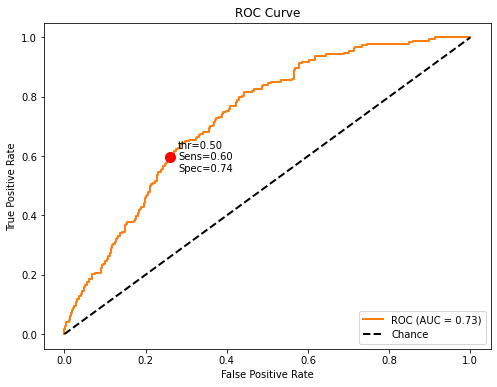

In [10]:
y_proba = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, 'C1-', lw=2, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--', lw=2, label='Chance')
# annotate threshold=0.5
ix = np.argmin(np.abs(thresholds - 0.5))
plt.scatter(fpr[ix], tpr[ix], c='red', s=100, zorder=5)
plt.text(
    fpr[ix]+0.02, tpr[ix]-0.05,
    f"thr={thresholds[ix]:.2f}\nSens={tpr[ix]:.2f}\nSpec={(1-fpr[ix]):.2f}"
)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [11]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=20, random_state=42)


scores = cross_val_score(rf, X, Y, cv=cv, scoring='accuracy', n_jobs=-1)


print("All 100 accuracies:\n", scores)


print(f"\nMean accuracy: {scores.mean():.4f}")
print(f"Std  accuracy: {scores.std():.4f}")

All 100 accuracies:
 [0.74500588 0.70505288 0.70035253 0.74500588 0.70823529 0.72737955
 0.70035253 0.75910693 0.69212691 0.71294118 0.70740306 0.7132785
 0.73207991 0.7132785  0.72352941 0.71680376 0.72502938 0.72150411
 0.71210341 0.72235294 0.71680376 0.71210341 0.71092832 0.74383079
 0.71647059 0.72150411 0.72855464 0.7027027  0.7132785  0.72588235
 0.73795535 0.70387779 0.72032902 0.71562867 0.71529412 0.70035253
 0.73443008 0.71210341 0.74618096 0.71058824 0.72855464 0.73560517
 0.74030552 0.71680376 0.68823529 0.68507638 0.74383079 0.70857814
 0.73325499 0.74705882 0.71210341 0.71797885 0.70857814 0.72032902
 0.70941176 0.73325499 0.72032902 0.70622797 0.72032902 0.71058824
 0.7132785  0.7426557  0.71092832 0.69212691 0.72941176 0.72385429
 0.72737955 0.71210341 0.72737955 0.70941176 0.72620447 0.73560517
 0.71562867 0.7027027  0.70470588 0.72032902 0.7226792  0.71797885
 0.72385429 0.71176471 0.70622797 0.74618096 0.70857814 0.72385429
 0.71764706 0.70622797 0.74500588 0.721504

In [12]:
# Getting 100 F1 scores
f1_scores = cross_val_score(rf, X, Y, cv=cv, scoring='f1_macro', n_jobs=-1)
print("\nAll 100 F1 scores:\n", f1_scores)
print(f"\nMean F1-score: {f1_scores.mean():.4f}")
print(f"Std  F1-score: {f1_scores.std():.4f}")


All 100 F1 scores:
 [0.67895446 0.64333553 0.62862277 0.69237394 0.64271429 0.66994329
 0.63325475 0.69338184 0.61988202 0.65977914 0.65487469 0.64864225
 0.66131127 0.65369118 0.64932701 0.65754527 0.66468984 0.65483763
 0.6355626  0.65915887 0.65590895 0.64318658 0.64309534 0.68210139
 0.65407419 0.64936501 0.65915439 0.63877578 0.65204306 0.6655572
 0.67848436 0.6480239  0.64050763 0.65571671 0.6513583  0.64263541
 0.67043538 0.65103395 0.6808617  0.63924391 0.66777195 0.66531259
 0.67895947 0.65754527 0.62588712 0.61215564 0.67704097 0.6551368
 0.67271726 0.68346154 0.63253346 0.66770793 0.64801398 0.65293638
 0.64632197 0.66769078 0.65293638 0.64088706 0.66220697 0.64293033
 0.65530544 0.67856385 0.64749444 0.62637411 0.66444911 0.66366521
 0.65813351 0.64226826 0.66994329 0.64459289 0.66238266 0.67314878
 0.64619154 0.63963914 0.65040351 0.65728219 0.66264194 0.66095618
 0.65507993 0.64393127 0.64433545 0.68255043 0.64288228 0.66118307
 0.65423963 0.64262917 0.68149934 0.6582995

In [14]:
auc_scores = cross_val_score(rf, X, Y, cv=cv, scoring='roc_auc', n_jobs=-1)
print("\nAll 100 AUC scores:\n", auc_scores)
print(f"\nMean AUC: {auc_scores.mean():.2f}")
print(f"Std  AUC: {auc_scores.std():.2f}")



All 100 AUC scores:
 [0.7776954  0.74108726 0.72888324 0.79991401 0.74295166 0.78960128
 0.74207974 0.78254013 0.71996169 0.7731173  0.77149335 0.75537432
 0.76384378 0.75225141 0.75133581 0.74592022 0.77652246 0.75870483
 0.7361945  0.78076282 0.77926846 0.73292379 0.75445245 0.79005629
 0.75596791 0.7629729  0.75785357 0.74399018 0.75887273 0.77035925
 0.78046101 0.75076104 0.75342858 0.76643996 0.75495427 0.74673226
 0.76686046 0.75467213 0.79058005 0.75039288 0.76969668 0.75332266
 0.77148551 0.76981707 0.73591903 0.69138069 0.79430087 0.74190714
 0.77573483 0.7845738  0.7239169  0.79425379 0.76773918 0.77082942
 0.75278555 0.78404651 0.75832039 0.75006669 0.75299406 0.75045182
 0.78246952 0.78249306 0.7489526  0.73112883 0.75585397 0.76366332
 0.76951623 0.75527625 0.76076845 0.75770839 0.75323636 0.76866105
 0.74808564 0.75109443 0.77195436 0.75620989 0.75769273 0.75746913
 0.77358505 0.7621244  0.75758289 0.7844231  0.73924744 0.76740932
 0.75502892 0.75670417 0.78287357 0.7549